<a href="https://colab.research.google.com/github/FedeSanta777/AIFundamentals/blob/main/Copia_di_Homework_Fondamenti_di_IA_AA_2023_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [59]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [60]:
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset = dataset.sample(frac=1)
dataset_training_4_print = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_dummies = pd.get_dummies(dataset, dtype=int)
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset_training = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]

dataset_training_dummies = dataset_dummies[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test_dummies = dataset_dummies[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]

print(dataset)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  19.000000  1.510000   59.000000                            yes   
1       Male  24.001196  1.603091  100.209405                            yes   
2     Female  19.755797  1.542328   63.856193                             no   
3       Male  26.348156  1.830317  117.757010                            yes   
4     Female  21.024970  1.666203   49.869791                            yes   
...      ...        ...       ...         ...                            ...   
2106  Female  19.000000  1.560000   50.000000                             no   
2107    Male  17.000000  1.790000   57.000000                            yes   
2108    Male  23.000000  1.650000   67.000000                            yes   
2109  Female  26.000000  1.626483  111.357062                            yes   
2110  Female  18.874591  1.533609   41.669346                             no   

     FAVC      FCVC       NCP        CA

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
#import warnings
%matplotlib inline


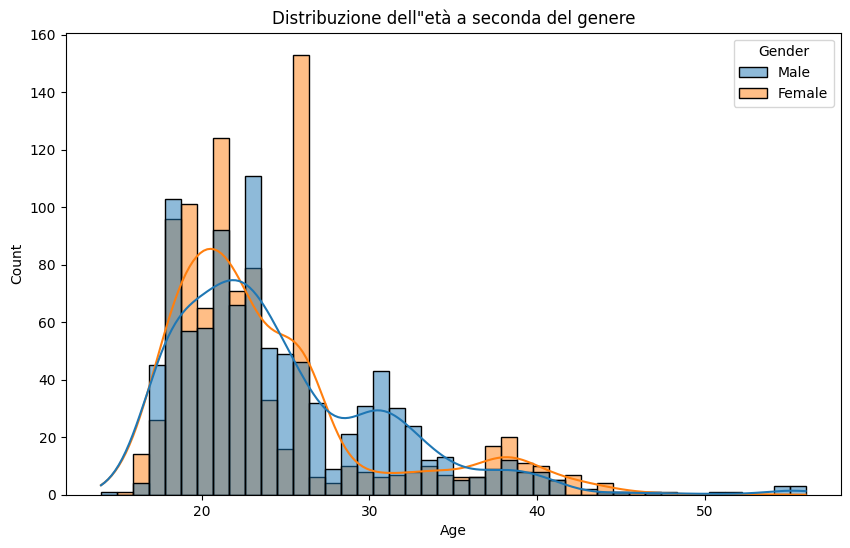

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_training_4_print, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

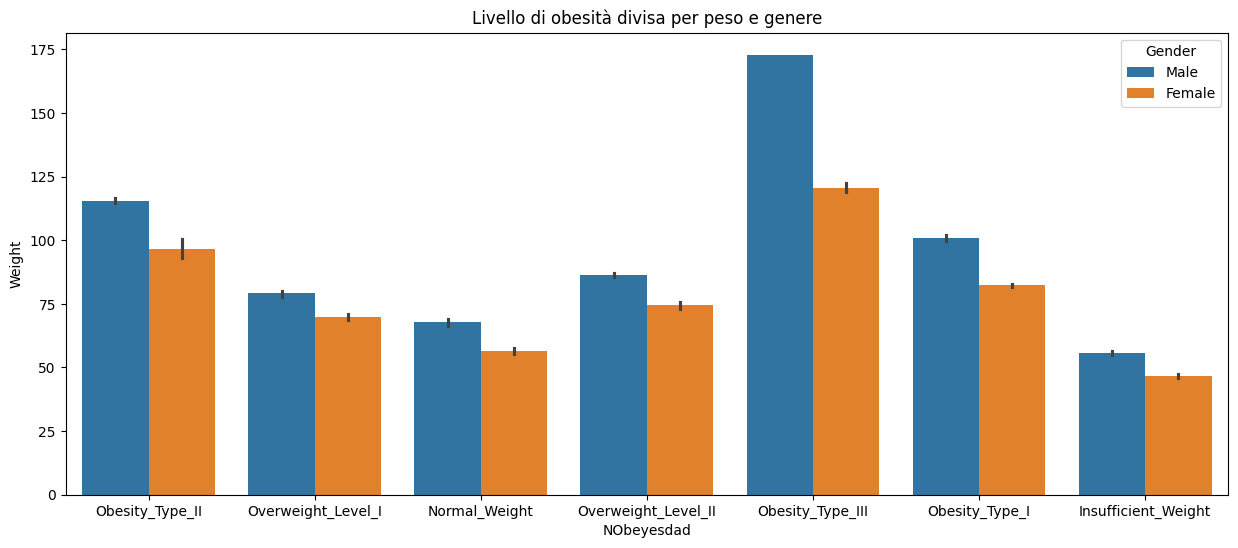

In [63]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset_training_4_print, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

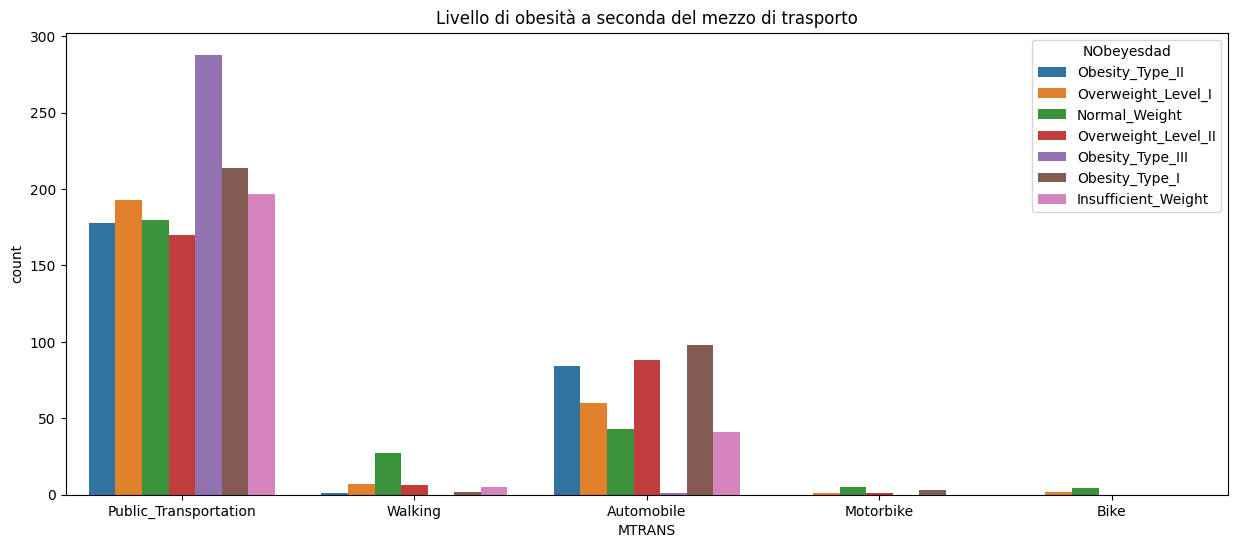

In [64]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training_4_print, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

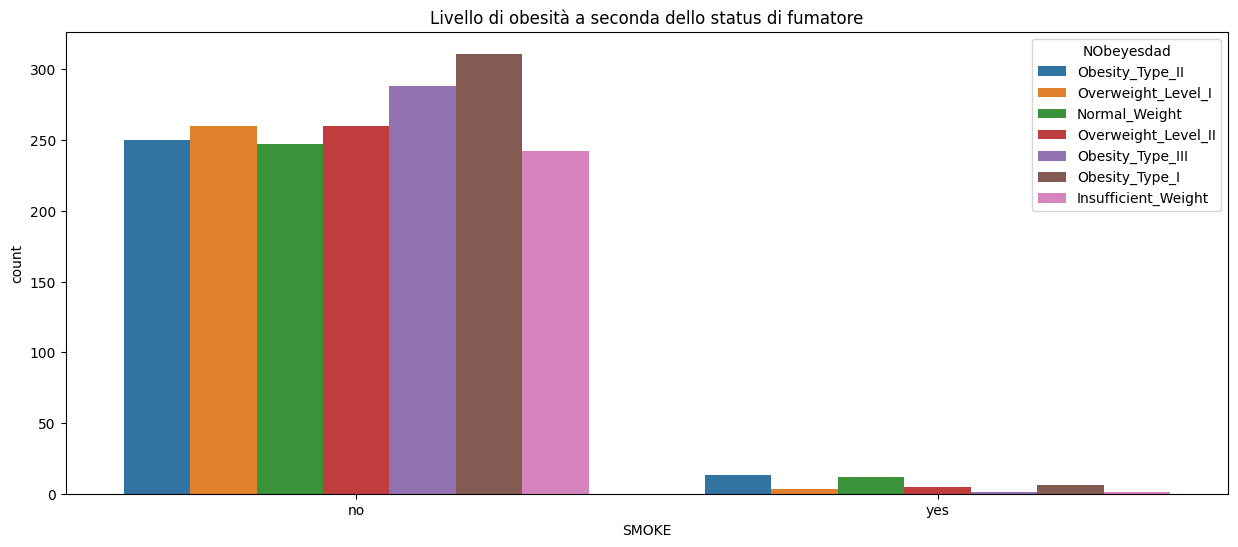

In [65]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training_4_print, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

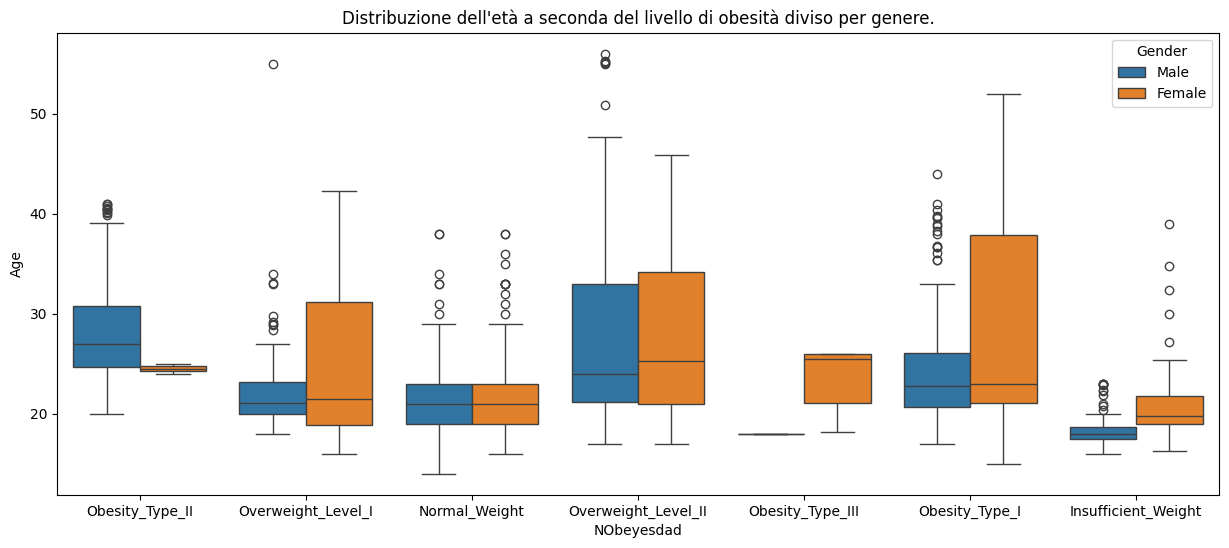

In [66]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset_training_4_print, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()

In [67]:
# Task 1 Homework

import math

# # FASE I: Preparazione del dataset
# # Creo dei dizionari per ogni campo non numerico del dataset con i valori possibili che possono assumere
# gender_map = {
#     "Male": 0, "Female": 1
# }
# yesNo_map = {
#     "yes": 0, "no": 1
# }
# caec_map = {
#     "Always": 0, "Frequently": 1, "no": 2, "Sometimes": 3
# }
# calc_map = {
#     "Always": 0, "Frequently": 1, "no": 3, "Sometimes": 2
# }
# mtrans_map = {
#     "Automobile": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4
# }
# # Osservazione: ordinare gli indici in base alla fascia di peso migliora decisamente il risultato del train
# nobeyesdad_map = {
#     "Overweight_Level_I":2 , "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5,
#     "Obesity_Type_III": 6, "Normal_Weight": 1, "Insufficient_Weight": 0
# }

# #warnings.filterwarnings('ignore')

# # Sostituisco tutti i valori dei campi che non hanno un dominio numerico con valori
# # numerici sfruttando i dizionari creati
# dataset_training.Gender.replace(gender_map, inplace=True)
# dataset_training.family_history_with_overweight.replace(yesNo_map, inplace=True)
# dataset_training.FAVC.replace(yesNo_map, inplace=True)
# dataset_training.CAEC.replace(caec_map, inplace=True)
# dataset_training.SMOKE.replace(yesNo_map, inplace=True)
# dataset_training.SCC.replace(yesNo_map, inplace=True)
# dataset_training.CALC.replace(calc_map, inplace=True)
# dataset_training.MTRANS.replace(mtrans_map, inplace=True)
# dataset_training.NObeyesdad.replace(nobeyesdad_map, inplace=True)

# Estraggo il vettore y prendendo la colonna dei pesi (dato da inferire)
yTraining = dataset_training_dummies.Weight
yTraining = yTraining.to_numpy()

# Rimuovo il campo pesi dal dataset di training in modo da avere la nostra matrice X
XTraining = dataset_training_dummies.drop(["Weight"], axis=1)
XTraining.insert(0, "bias", 1, False)

X = XTraining.to_numpy()
#print(X)

# Calcolo c = (XTX)-1XTY

pinv=np.linalg.pinv(X)
# print(type(pinv))
# print(type(yTraining))
c=pinv@yTraining


# Testo il training Y’ = cTX
yAttesa = dataset_test_dummies.Weight
yAttesa = yAttesa.to_numpy()
dataset_test_LR = dataset_test_dummies.drop(["Weight"], axis=1)
dataset_test_LR.insert(0, "bias", 1, allow_duplicates=False)
# dataset_test.Gender.replace(gender_map, inplace=True)
# dataset_test.family_history_with_overweight.replace(yesNo_map, inplace=True)
# dataset_test.FAVC.replace(yesNo_map, inplace=True)
# dataset_test.CAEC.replace(caec_map, inplace=True)
# dataset_test.SMOKE.replace(yesNo_map, inplace=True)
# dataset_test.SCC.replace(yesNo_map, inplace=True)
# dataset_test.CALC.replace(calc_map, inplace=True)
# dataset_test.MTRANS.replace(mtrans_map, inplace=True)
# dataset_test.NObeyesdad.replace(nobeyesdad_map, inplace=True)
XTest = dataset_test_LR.to_numpy()

yTest = np.dot(XTest,c)

# Valuto la qualità del training


def MSE(yAttesa, yInferita):
    sum = 0
    scarto = yInferita-yAttesa
    sum = np.dot(scarto,scarto)
    # for i in range(len(yAttesa)):
    #     scarto = yInferita[i]-yAttesa[i]
    #     scarto = math.pow(scarto,2)
    #     sum += scarto
    sum = sum/len(yAttesa)
    return sum

# calcola l'accuracy della regressione
def accuracy(yAttesa, yCalcolata):
    count = 0
    for i in range(len(yAttesa)):
        if(yAttesa[i]==yCalcolata[i]):
            count += 1
    return count/len(yAttesa)

print(MSE(yAttesa,yTest))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, yTraining)

y_pred = model.predict(XTest)

print(yAttesa)

print(MSE(yAttesa,y_pred))


26.93811950479726
[ 77.858532  67.       111.939983  80.        62.        57.790381
 105.138073 113.207124 121.094257  83.520113 112.875283  99.605527
  50.       125.064264  54.567343  60.        52.331172  89.93889
 120.975489  59.        72.        69.743323  82.523113  60.
  68.803694  65.        68.85097   85.        78.       104.947703
  58.854416  82.040318  84.       118.299585  80.        55.
  50.       114.097656  85.312639  41.669346 130.927138 132.57927
 133.689352  56.        75.0522    82.853749  66.126964  79.697278
 151.975864  65.       114.511537  91.       105.        83.
  67.        50.        77.473204 133.554686 104.321463 105.131956
 102.872505  49.839685 112.835195  81.919454  44.376637 119.050381
  87.676154 112.289883  54.121925 124.269251  49.125955  65.
  43.919835 133.10761  105.428628  60.117993 120.082941 104.768318
  50.       116.311962 129.874864  85.       104.899348  56.
 112.879662  70.        88.        75.       133.644711  75.
 121.204668  39

In [68]:
# Task 2 Homework: Learning Decision Trees
# TODO: Il dataset va modificato in modo da classificare in modo binario gli esempi dati

dataset_training_lds = dataset_training
dataset_test_lds = dataset_test

# TODO: Va scelto il tipo dei seguenti attributi
# - esempi: matrice o dataset se posso accedere con gli indici posizionali ai campi del dataset
# - attributi: lista di indici

# # Creo dei dizionari per ogni campo non numerico del dataset con i valori possibili che possono assumere
gender_map = {
    "Male": 0, "Female": 1
}
yesNo_map = {
    "yes": 0, "no": 1
}
caec_map = {
    "Always": 0, "Frequently": 1, "no": 2, "Sometimes": 3
}
calc_map = {
    "Always": 0, "Frequently": 1, "no": 3, "Sometimes": 2
}
mtrans_map = {
    "Automobile": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4
}
nobeyesdad_map = {
    "Overweight_Level_I":0 , "Overweight_Level_II": 0, "Obesity_Type_I": 1, "Obesity_Type_II": 1,
    "Obesity_Type_III": 1, "Normal_Weight": 0, "Insufficient_Weight": 0
}

# Osservazione: ordinare gli indici in base alla fascia di peso migliora decisamente il risultato del train

# Sostituisco tutti i valori dei campi che non hanno un dominio numerico con valori
# numerici sfruttando i dizionari creati


dataset_training_lds.Gender.replace(gender_map, inplace=True)
dataset_training_lds.family_history_with_overweight.replace(yesNo_map, inplace=True)
dataset_training_lds.FAVC.replace(yesNo_map, inplace=True)
dataset_training_lds.CAEC.replace(caec_map, inplace=True)
dataset_training_lds.SMOKE.replace(yesNo_map, inplace=True)
dataset_training_lds.SCC.replace(yesNo_map, inplace=True)
dataset_training_lds.CALC.replace(calc_map, inplace=True)
dataset_training_lds.MTRANS.replace(mtrans_map, inplace=True)
dataset_training_lds.NObeyesdad.replace(nobeyesdad_map, inplace=True)

# Creazione dizionari utilizzati per dividere i rami degli alberi

disc = {
    0: [0,1],
    1: [0,20,30],
    2: [0,1.70,1.85],
    3: [0,60,80,120],
    4: [0,1],
    5: [0,1],
    6: [0,2,3],
    7: [0,2,3],
    8: [0,1,2,3],
    9: [0,1],
    10: [0,1,2.5],
    11: [0,1],
    12: [0,1,2],
    13: [0,1],
    14: [0,1,2,3],
    15: [0,1,2,3,4]
}




class NodoAlbero:
    
    def __init__(self, esempi, attributiDisponibili, esitoPadre):
        # tengo traccia in ogni nodo degli esempi utilizzati per dividerlo in più rami
        # e degli attributi disponibili
        self.esempi = esempi
        self.attributiDisponibili = attributiDisponibili
        # se non ho esempi disponibili chiudo impostando quello
        # più frequente fra gli esempi del padre
        if(len(self.esempi)==0):
            self.foglia = True
            self.esito = esitoPadre
            return
        # calcolo l'esito di maggioranza nel nodo
        esitoDiMaggioranza = NodoAlbero.mostOccurrence(self.esempi)
        # controllo se sono finiti gli attributi
        if(len(self.attributiDisponibili)==0):
            self.esito = esitoDiMaggioranza
            self.foglia = True
            return
        # mi assicuro che il nodo non contenga solo esempi con lo stesso esito
        elif(self.estFoglia()):
            # se si indico che il nodo è un nodo foglia e mi salvo l'esito da registrarmi
            self.esito = esitoDiMaggioranza
            self.foglia = True
            return
        else:
            # se gli esempi sono diversificati in termini di esiti
            # indico che non si tratta di una foglia
            self.foglia = False
            # individuo l'attributo con il Gain più alto
            self.attributo = self.trovaAttributo()
            print(self.attributo)
            # lo rimuovo dalla lista degli attributi da andare a controllare nelle prossime iterazioni
            self.attributiDisponibili.remove(self.attributo)
            # definisco una struttura dati che andrà a contenere tutti i nodi rami
            self.branches = []
            # definisco una struttura dati che andrà a contenere tutte le liste di esempi da smistare
            # lista contenente i valori degli attributi assegnati
            esempiBranch, self.listaValori, _ = NodoAlbero.dividiDatoAttributo(self.esempi,self.attributo)
            # per ogni fascia appartenente all'attributo chiamo un costruttore nodo passando gli esempi
            # della rispettiva diramazione e la lista di attributi disponibili
            for b in range(len(esempiBranch)):
                self.branches.append(NodoAlbero(esempiBranch[b],attributiDisponibili,esitoDiMaggioranza))
        return
    
    def inferisci(self, x):
        if(self.foglia):
            # print("Foglia: ",self.esito)
            return self.esito
        else:
            # TODO: va analizzato in che range del rispettivo attributo ci troviamo
            # per poi indirizzare la ricerca nel giusto ramo
            for i in reversed(range(len(self.listaValori))):
                # print(i)
                # print(x[self.attributo],self.listaValori[i])
                if(x[self.attributo]>=self.listaValori[i]):
                    return self.branches[i].inferisci(x)
            
    def estFoglia(self):
        esito = self.esempi[0][16]
        for r in self.esempi:
            if(r[16]!=esito):
                return False
        return True
    
    def trovaAttributo(self):
        # TODO: calcola l'attributo col gain di entropia maggiore e lo restituisce
        listaGain = []
        for att in self.attributiDisponibili:
            listaGain.append(self.calcolaGain(att))
        return self.attributiDisponibili[listaGain.index(max(listaGain))]
    
    def calcolaGain(self, attributo):
        # TODO: calcola l'entropia di una suddivisione secodo l'attributo dato
        # definisco una struttura dati che andrà a contenere tutte le liste di esempi da smistare
        #print(self.esempi)
        totEsempi = len(self.esempi)
        esempiBranch, _, positivi = NodoAlbero.dividiDatoAttributo(self.esempi,attributo)
        # calcolo # B(p/p+n)
        pFrattopPiun = positivi/len(self.esempi)
        B = -((pFrattopPiun*math.log2(pFrattopPiun))+((1-pFrattopPiun)*math.log2(1-pFrattopPiun)))
        # rimanenza per il calcolo del gain
        rimanenza = 0
        # una volta suddiviso in sottoliste calcolo il gain informativo
        #print(esempiBranch)
        for k in esempiBranch:
            #print(len(k))
            numEsempi = len(k)
            rapp = numEsempi/totEsempi
            countP = 0
            for e in k:
                if(e[16]==0):
                    countP += 1
            if(numEsempi==0):
                rimanenza += 0
            else:
                q = countP/numEsempi
                #print(q,rapp)
                if(q==1):
                    rimanenza += rapp*(-((q*math.log2(q))))
                elif(q==0):
                    rapp*(-((1-q)*math.log2(1-q)))
                else:
                    rimanenza += rapp*(-((q*math.log2(q))+((1-q)*math.log2(1-q))))
        return B-rimanenza
    
    def stampaAlbero(self):
        #esegui una bfs per stampare l'albero
        #per nodi alla stesso livello stampa a capo
        #di ogni nodo non foglia voglio stampare l'attributo e i valori di suddivisione
        #di ogni nodo foglia voglio stampare l'esito
        if(self.foglia):
            print("Foglia: ",self.esito)
        else:
            print("Attributo: ",self.attributo)
            for i in range(len(self.branches)):
                print("Valore: ",self.listaValori[i])
                self.branches[i].stampaAlbero()
        return
    
    @staticmethod
    def mostOccurrence(esempi):
        countP = 0
        countN = 0
        for t in esempi:
            if(t[16]==0):
                countP += 1
            else:
                countN += 1
        if countP>=countN:
            return 0
        else:
            return 1
    
    @staticmethod
    def dividiDatoAttributo(esempi, attributo):
        # definisco una struttura dati che andrà a contenere tutte le liste di esempi da smistare
        esempiBranch = []
        # lista contenente i valori degli attributi assegnati
        listaValori = []
        # itero sui valori contenuti nel campo del dizionario corrispondente all'attributo individuato
        for i in range(len(disc[attributo])-1):
            listaValori.append(disc[attributo][i])
            # lista che conterrà gli esempi nei vari range dettati dal dizionario
            lista = []
            # itero sulle righe del dataset
            for r in esempi:
                #print(lista)
                # se il valore dell'attributo rientra nella fascia analizzata
                if(r[attributo]>=disc[attributo][i] and r[attributo]<disc[attributo][i+1]):
                    # aggiungo alla lista di esempi la riga
                    # print("inserisco ",r,type(r))
                    lista.append(r)
                    # print("inserito")
                    # TODO: rimuovere le righe inserite nella lista dal dataset per velocizzare il training
            # aggiungo la lista di esempi alla struttura dati
            esempiBranch.append(lista)
        # inserisco tutte le altre righe nell'ultimo campo esempio
        # TODO: se rimuovo gli esempi alla fine inserirò senza controlli le righe restanti
        lista = []
        p = 0
        # approfitto dell'ultima scansione della lista di esempi per contare il numero di occorrenze
        # di esiti positivi all'interno degli esempi
        listaValori.append(disc[attributo][-1])
        for r in esempi:
            if(r[attributo]>disc[attributo][len(disc[attributo])-1]):
                    lista.append(r)
            if(r[16]==0):
                p += 1
        esempiBranch.append(lista)
        
        return esempiBranch, listaValori, p
        
        
listaAttributi = list(range(16))

# trasformo il dataset in una lista di liste
# per ogni lista ho una riga corrispondente al dataset
list_df = [row.tolist() for index, row in dataset_training_lds.iterrows()]
    
#print(len(list_df))
    
radice = NodoAlbero(list_df,listaAttributi,1)

# radice.stampaAlbero()

dataset_test_lds.NObeyesdad.replace(nobeyesdad_map, inplace=True)
dataset_test_lds.Gender.replace(gender_map, inplace=True)
dataset_test_lds.family_history_with_overweight.replace(yesNo_map, inplace=True)
dataset_test_lds.FAVC.replace(yesNo_map, inplace=True)
dataset_test_lds.CAEC.replace(caec_map, inplace=True)
dataset_test_lds.SMOKE.replace(yesNo_map, inplace=True)
dataset_test_lds.SCC.replace(yesNo_map, inplace=True)
dataset_test_lds.CALC.replace(calc_map, inplace=True)
dataset_test_lds.MTRANS.replace(mtrans_map, inplace=True)

yAttesa = dataset_test_lds.NObeyesdad
yAttesa = yAttesa.to_numpy()

# print(yAttesa)

list_dt = [row.tolist() for index, row in dataset_test_lds.iterrows()]

yCalcolata = []

for i in range(len(list_dt)):
    # print(list_dt[i])
    yCalcolata.append(radice.inferisci(list_dt[i]))

yCalcolata = np.array(yCalcolata)

# print(yCalcolata,yAttesa)

# print(list_df)
#print(radice.inferisci(list_df[0]))



print(accuracy(yAttesa,yCalcolata))

# utilizzo la libreria sklearn per verificare la correttezza dell'albero costruito

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Creazione del modello
model = DecisionTreeClassifier()

# Preparazione dei dati
X_train = dataset_training_lds.drop('NObeyesdad', axis=1)
y_train = dataset_training_lds['NObeyesdad']

X_test = dataset_test_lds.drop('NObeyesdad', axis=1)
y_test = dataset_test_lds['NObeyesdad']

# Addestramento del modello
model.fit(X_train, y_train)

# Predizione dei risultati del test set
y_pred = model.predict(X_test)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)


0.47641509433962265
0.5235849056603774
Accuracy:  0.9716981132075472


C:\Users\feder\AppData\Local\Temp\ipykernel_25464\1366377920.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_training_lds.Gender.replace(gender_map, inplace=True)
C:\Users\feder\AppData\Local\Temp\ipykernel_25464\1366377920.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_training_lds.family_history_with_overweight.replace(yesNo_map, inplace=True)
C:\Users\feder\AppData\Local\Temp\ipykernel_25464\1366377920.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui